In [49]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import requests
import json
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


In [3]:
df.head(3)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month
0,2014-04-09,447.110,243742.0,122401,64992,38.678,239212041.0,0.1390,0.0447,8.944,5587996110,4115.0,100.420,8193,11.193,0.502,179274,19.211,2014,4
1,2014-04-10,407.703,254334.0,124298,67872,31.917,310367120.0,0.0864,0.0408,9.290,5020359905,4876.0,120.946,15039,13.854,0.371,182996,19.166,2014,4
2,2014-04-11,403.328,223656.0,117926,65563,36.814,292756343.0,0.0858,0.0403,8.521,5068919648,4819.0,108.481,14907,12.997,0.330,169622,19.141,2014,4


**INTRODUCCIÓN**

Bitcoin vio su nacimiento en el año 2009, y hasta la actualidad se desconoce la identidad real de su creador, a quien se le atribuye el seudónimo de Satoshi Nakamoto pudiendo ser un individuo o un grupo de personas.

Bitcoin es una moneda virtual o un medio de intercambio electrónico que sirve para adquirir productos y servicios como cualquier otra moneda. La diferencia con el resto de las monedas "FIAT" se da en que esta moneda digital es descentralizada, es decir que no existe una autoridad o ente de control que sea responsable de su emisión y registro de sus movimientos.

Por tal motivo, el precio de este activo se regula en el propio mercado de compra-venta, donde los oferentes y compradores emiten órdenes de venta y órdenes de compra estableciendo precios de entrada o salida al activo.

En los últimos años, se ha visto un creciente interés por parte de grandes empresas en aceptar Bitcoin como forma de pago, o bien resguardar parte de su patrimonio en este activo; esto ha generado que se dispare su precio llegando a tocar casi los usd 70.000 en noviembre de 2021.

**Abstracto, motivación y audiencia**

Este proyecto de data science tiene como objetivo analizar la evolución histórica del precio de Bitcoin utilizando un conjunto de datos que incluye información sobre la fecha, el precio en USD, el número de transacciones, la capitalización de mercado, la presencia de la tematica Bitcoin en redes sociales y otros indicadores relevantes.

La hipótesis principal de este proyecto es que el precio de Bitcoin ha sido influenciado por una variedad de factores, incluyendo la adopción por parte de grandes empresas, la regulación gubernamental, la oferta y la demanda del mercado y la actividad en las redes sociales. Se espera que este análisis proporcione una mejor comprensión de cómo estos factores han afectado al precio de Bitcoin a lo largo del tiempo y cómo podrían seguir influyendo en el futuro.

La audiencia principal de este proyecto es cualquier persona interesada en Bitcoin y en las criptomonedas en general, incluyendo inversores, entusiastas y empresas que podrían estar considerando la adopción de esta tecnología. Además, los resultados de este análisis podrían ser útiles para reguladores y responsables políticos que buscan comprender mejor los factores que influyen en el precio de Bitcoin y cómo podrían afectar la economía en general.

**Análisis Exploratorio de Datos (EDA)**

En primer lugar para realizar el análisis exploratorio de datos es conveniente comprobar que no existan valores nulos, y a su vez obtener que tipos de datos hay en cada columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3180 non-null   datetime64[ns]
 1   priceUSD                3180 non-null   float64       
 2   size                    3180 non-null   float64       
 3   sentbyaddress           3180 non-null   int64         
 4   transactions            3180 non-null   int64         
 5   mining_profitability    3180 non-null   float64       
 6   sentinusd               3180 non-null   float64       
 7   transactionfees         3180 non-null   float64       
 8   median_transaction_fee  3180 non-null   float64       
 9   confirmationtime        3180 non-null   float64       
 10  marketcap               3180 non-null   int64         
 11  transactionvalue        3180 non-null   float64       
 12  mediantransactionvalue  3180 non-null   float64 

### Descripción de variables:

- Date : fecha en formato datetime.

- priceUSD: precio de BTC en la fecha dada.

- size: representa el tamaño de las transacciones realizadas en la fecha.

- sentbyadress: cantidad de direcciones de BTC que interactuaron en transacciones.

- transactions: cantidad de transacciones realizada.

- mining_profitability: rentabilidad de minado.

- sentinusd: cantidad de BTC enviada cotizada en USD.

- transactionfees: tarifas diarias promedio por transacción.

- median_transaction_fee: mediana de tarifas de transacción diaria promedio.

- confirmationtime: tiempo medio diario de confirmación de transacciones realizadas.

- marketcap: capitalización de mercado valuada en USD.

- transactionvalue: valor promedio de las transacciones diarias.

- mediantransactionvalue: media del valor de transacciones diario promedio.

- tweets: cantidad de tweets diarios sobre la tematica bitcoin.

- google_trends: promedio de tendencias en google sobre tematica bitcoin.

- fee_to_reward: promedio de comisiones a pagar

- activeaddresses: direcciones activas diarias

**GRÁFICOS Y ANÁLISIS GENERALES SOBRE BITCOIN**

Text(0, 0.5, 'Transacciones')

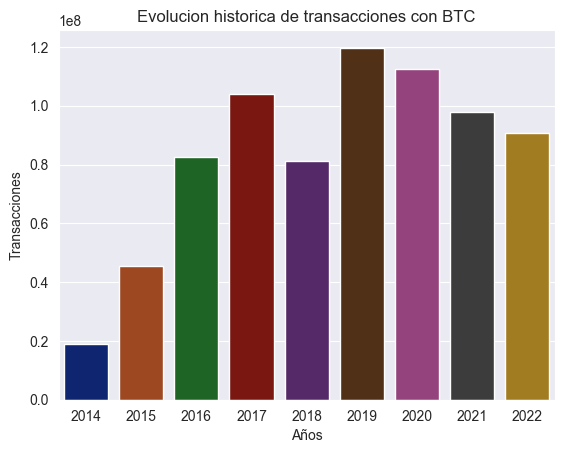

In [5]:
df_tran = df.groupby(['Year'])['transactions'].sum().reset_index()


sns.set_palette("dark")
sns.set_style("darkgrid")

ax = sns.barplot(x="Year", y="transactions", data=df_tran)
ax.set_title('Evolucion historica de transacciones con BTC')
plt.xlabel("Años")
plt.ylabel("Transacciones")

En este caso se analiza la evolución histórica de transacciones realizadas en la blockchain de Bitcoin.

In [6]:
df_tran.head(10)

,Year,transactions
0,2014,18951966
1,2015,45618870
2,2016,82571772
3,2017,104010023
4,2018,81340729
5,2019,119726948
6,2020,112497226
7,2021,97743767
8,2022,90826733


Se puede ver que hasta el año 2019 se dio un crecimiento grande en este índice, y en 2020 ha comenzado un retroceso en la cantidad de transacciones anuales, lo cual puede responder a la inestabilidad en el precio del activo.

**HEATMAP de precios de Bitcoin**

El siguiente HeatMap muestra los precios máximos que ha tenido Bitcoin en cada mes de cada año desde su creación.

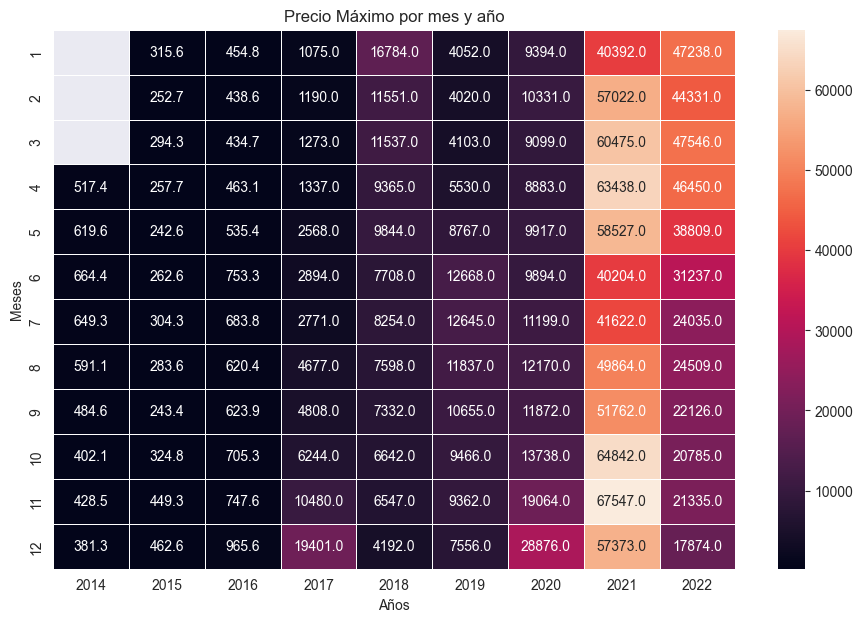

In [7]:
df_price_order = df.groupby(['Year', 'Month'])['priceUSD'].max().reset_index()
df_price_order1 = df_price_order.pivot(index='Month', columns='Year', values='priceUSD')

f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(df_price_order1, annot=True, fmt=".1f", linewidths=.5, ax=ax)
plt.xlabel("Años")
plt.ylabel("Meses")
ax.set_title('Precio Máximo por mes y año')
plt.show()


Podemos ver que su precio más alto fue visto en el mes de noviembre de 2021, cuando alcanzó el monto de USD 67.547

**TRANSACCIONES ENVIADAS DE BTC COTIZADAS EN USD**

Text(0, 0.5, 'Transacciones cotizadas en millones de dolares')

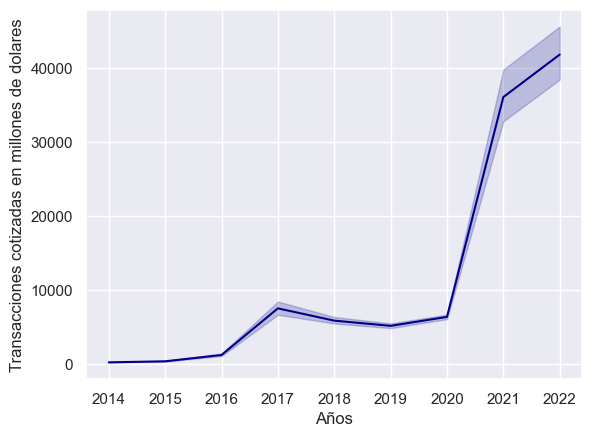

In [8]:
df['sentin_Musd'] = df['sentinusd'] / 1000000

sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="sentin_Musd", data=df, color="darkblue")
plt.xlabel("Años")
plt.ylabel("Transacciones cotizadas en millones de dolares")

En este grafico se analiza la cantidad de transacciones enviadas en BTC cotizadas en USD.

Aunque se puede apreciar en el HEATMAP previamente presentado que los precios de BTC han fluctuado y alcanzado sus máximos hace más de un año, se puede observar una tendencia creciente en el volumen de transacciones realizadas año tras año, la cual parece mantenerse.

La creciente adopción de Bitcoin es probable que haya sido un factor determinante en el aumento del volumen de transacciones. Cada vez son más las personas y empresas que están utilizando Bitcoin como medio de pago o inversión, lo que ha llevado a un aumento en la cantidad de transacciones realizadas en la red.

**HIPÓTESIS 1**

La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

En el siguiente gráfico, se contrastará la evolución del marketcap de Bitcoin, para demostrar como la evolución de este sigue la misma tendencia que la evolución del precio del activo.

Text(0.5, 1.0, 'Grafico precio BTC')

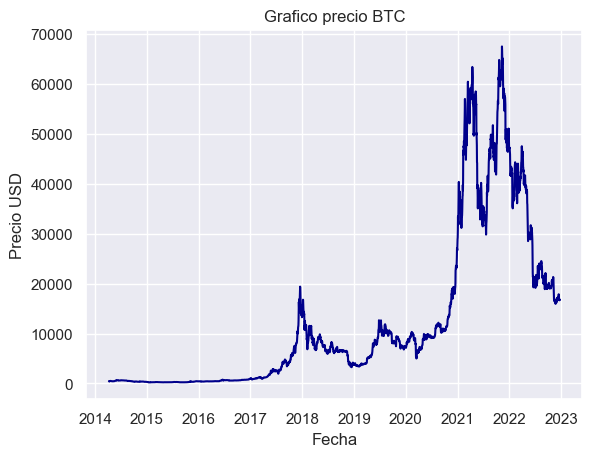

In [9]:
custom_palette = sns.color_palette(['darkblue'])
sns.set_palette(custom_palette)
fig, ax = plt.subplots()
x = df.Date
y = df.priceUSD

ax.plot(x, y, label='Precio BTC')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Grafico precio BTC')

Text(0.5, 1.0, 'Capitalización de mercado de BTC expresada en USD Miles de Millones')

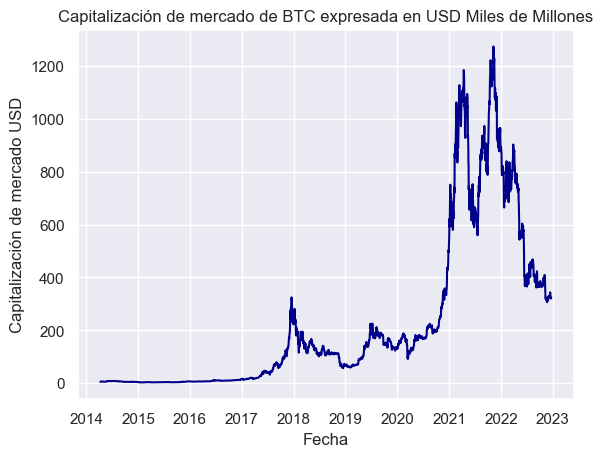

In [10]:
sns.set_palette(custom_palette)
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
fig, ax = plt.subplots()
x = df.Date
y = df.marketcap_en_MM
ax.plot(x, y, label='Capitalización de mercado de BTC expresada en USD Miles de Millones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Capitalización de mercado USD')
ax.set_title('Capitalización de mercado de BTC expresada en USD Miles de Millones')

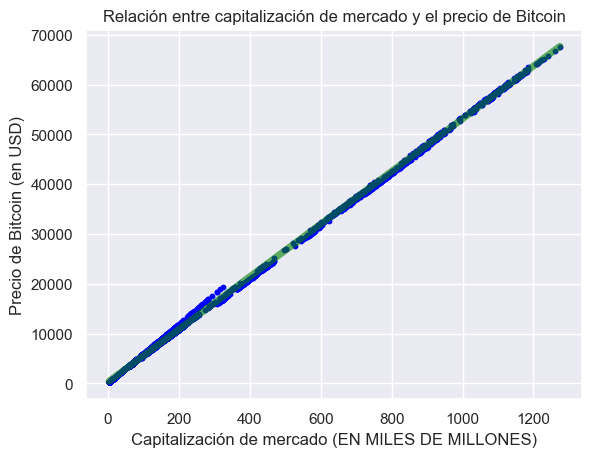

In [11]:
df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
plt.scatter(df['marketcap_en_MM'], df['priceUSD'], s=10, c='blue')

m, b = np.polyfit(df['marketcap_en_MM'], df['priceUSD'], 1)
x = np.linspace(min(df['marketcap_en_MM']), max(df['marketcap_en_MM']), 100)
y = m * x + b

plt.plot(x, y, color='green', linewidth=5, alpha=0.60)

plt.title('Relación entre capitalización de mercado y el precio de Bitcoin')
plt.xlabel('Capitalización de mercado (EN MILES DE MILLONES)')
plt.ylabel('Precio de Bitcoin (en USD)')
plt.grid(True)
plt.show()

In [12]:
correl_price_market = df['priceUSD'].corr(df['marketcap'])

print("Coeficiente de correlación:", correl_price_market)

Coeficiente de correlación: 0.9997780221209306


**CONCLUSION 1**

En los gráficos presentados podemos ver cómo la tendencia de la capitalización de mercado respeta los mismos parámetros que los del gráfico de la evolución del precio de BTC.

Como dato adicional, se calcula el coeficiente de correlación entre las variables ‘priceUSD’ y ‘marketcap’. El resultado obtenido refleja que la correlación entre ambos parámetros es prácticamente del 100%.

**HIPÓTESIS 2**

Como segunda hipótesis a plantear, surge la idea de que el precio de Bitcoin debería influir de forma directa en la cantidad de direcciones activas en determinados períodos de tiempo. Se plantea esto dado que ante precios mayores, aquellos que sean poseedores de wallets que contengan BTC tendrán mayores incentivos para realizar transacciones de compra-venta.
Para analizar este fenómeno se realizan los siguientes cálculos.

In [13]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235


Al realizar el cálculo del indice de correlación entre las "active adresseses" y el precio de BTC se nos muestra una fuerte correlación positiva entre estos factores, ya que el resultado de 0,665 se considera cercano a 1.

Para apoyar la hipotesis de que el precio de BTC influye directamente en la cantidad de direcciones activas, se procede a realizar dos modelos de regresión para realizar predicciones y evaluar el impacto del cambio de una variable en la otra. La idea de realizar dos modelos en lugar de solamente uno, se da para comparar los resultados de ambos modelos y seleccionar el modelo que mejor performe en general.

In [14]:
x = df[['priceUSD']]
y = df[['activeaddresses']]

x_trainLR, x_testLR, y_trainLR, y_testLR = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo = LinearRegression()
modelo.fit(x_trainLR, y_trainLR)

y_predLR = modelo.predict(x_testLR)

mse = mean_squared_error(y_testLR, y_predLR)
rmse = math.sqrt(mse)
mediana = df['activeaddresses'].median()
print('Error Cuadrático Medio (MSE):', mse)
print('Error Cuadrático Medio Raíz (RMSE):', rmse)

Error Cuadrático Medio (MSE): 28922636911.017258
Error Cuadrático Medio Raíz (RMSE): 170066.56611755662


Los valores de MSE y RMSE que se obtienen son demasiado elevados, lo cual indica un claro problema en la normalización de los datos.

Para solucionar este problema se aplicará transformación logarítmica a las variables de interés, con el objetivo de mejorar los resultados.

Al aplicar la transformación logarítmica, es posible mejorar la linealidad de las relaciones entre variables, reducir la asimetría y estabilizar la varianza, lo que podría resultar en mejores resultados y reducción de errores de predicción en el modelo de regresión lineal. 

In [15]:
df_log = pd.DataFrame

df['PriceUSD_log'] = np.log(df['priceUSD'])
df['activeaddresses_log'] = np.log(df['activeaddresses'])
df_log = df.drop(columns=['priceUSD', 'activeaddresses'])
df_log.head(1)

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,...,tweets,google_trends,fee_to_reward,top100cap,Year,Month,sentin_Musd,marketcap_en_MM,PriceUSD_log,activeaddresses_log
0,2014-04-09,243742.0,122401,64992,38.678,239212041.0,0.139,0.0447,8.944,5587996110,...,8193,11.193,0.502,19.211,2014,4,239.212041,5.587996,6.102805,12.096671


In [16]:
df_log['activeaddresses_log'].describe()

count    3180.000000
mean            -inf
std              NaN
min             -inf
25%        12.936532
50%        13.297468
75%        13.549254
max        13.994551
Name: activeaddresses_log, dtype: float64

Al transformar la variable 'activeaddresses' se generan valores *-inf*, los cuales pueden generar conflictos al momento de realizar el modelo de predicción

In [17]:
count_inf = np.isinf(df_log['activeaddresses_log']).sum()
print("Cantidad de valores -inf:", count_inf)

Cantidad de valores -inf: 22


Al contar la cantidad de valores *-inf* se observa que solamente son 22, dado que la cantidad no representa un peso importante sobre el total de datos, se procederá a eliminarlos del modelo.

In [18]:
df_log = df_log[~np.isinf(df_log['activeaddresses_log'])]

In [19]:
x = df_log[['PriceUSD_log', 'Year']]
y = df_log[['activeaddresses_log']]

x_trainLR2, x_testLR2, y_trainLR2, y_testLR2 = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo_logLR2 = LinearRegression()
modelo_logLR2.fit(x_trainLR2, y_trainLR2)

y_predLR2 = modelo_logLR2.predict(x_testLR2)

mse_LR2 = mean_squared_error(y_testLR2, y_predLR2)
rmse_LR2 = math.sqrt(mse_LR2)

y_train_predLR2 = modelo_logLR2.predict(x_trainLR2)
mse_train_LR2 = mean_squared_error(y_trainLR2, y_train_predLR2)
print(f'MSE en el conjunto de entrenamiento: {mse_train_LR2:.4f}')
print(f'RMSE en el conjunto de entrenamiento: {math.sqrt(mse_train_LR2):.4f}')

y_test_predLR2 = modelo_logLR2.predict(x_testLR2)
mse_test_LR2 = mean_squared_error(y_testLR2, y_test_predLR2)
print(f'MSE en el conjunto de prueba: {mse_test_LR2:.4f}')
print(f'RMSE en el conjunto de prueba: {math.sqrt(mse_test_LR2):.4f}')

MSE en el conjunto de entrenamiento: 0.0721
RMSE en el conjunto de entrenamiento: 0.2686
MSE en el conjunto de prueba: 0.0719
RMSE en el conjunto de prueba: 0.2682


In [20]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

x_train_PF, x_test_PF, y_train_PF, y_test_PF = train_test_split(x_poly, y, test_size=0.2, random_state=42)

model_PF = LinearRegression()
model_PF.fit(x_train_PF, y_train_PF)

y_train_pred_PF = model_PF.predict(x_train_PF)
mse_train_PF = mean_squared_error(y_train_PF, y_train_pred_PF)
print(f'MSE en el conjunto de entrenamiento: {mse_train_PF:.4f}')
print(f'RMSE en el conjunto de entrenamiento: {math.sqrt(mse_train_PF):.4f}')

y_test_pred_PF = model_PF.predict(x_test_PF)
mse_test_PF = mean_squared_error(y_test_PF, y_test_pred_PF)
print(f'MSE en el conjunto de prueba: {mse_test_PF:.4f}')
print(f'RMSE en el conjunto de prueba: {math.sqrt(mse_test_PF):.4f}')

MSE en el conjunto de entrenamiento: 0.0400
RMSE en el conjunto de entrenamiento: 0.1999
MSE en el conjunto de prueba: 0.0405
RMSE en el conjunto de prueba: 0.2013


### CROSSVALIDATION entre modelos

In [21]:
# LinearRegression
cv_scores_LR2 = cross_val_score(modelo_logLR2, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv_LR2 = np.sqrt(-cv_scores_LR2)
print(f'RMSE promedio en validación cruzada (Modelo Linear Regression): {np.mean(rmse_cv_LR2):.4f}')

# PolynomialFeatures
cv_scores_PF = cross_val_score(model_PF, x_poly, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv_PF = np.sqrt(-cv_scores_PF)
print(f'RMSE promedio en validación cruzada (Modelo Polynomial Features): {np.mean(rmse_cv_PF):.4f}')

RMSE promedio en validación cruzada (Modelo Linear Regression): 0.4138
RMSE promedio en validación cruzada (Modelo Polynomial Features): 0.3444


In [22]:
# Resultados del modelo LinearRegression
results_LR2 = {
    'MSE_TRAIN': mse_train_LR2,
    'RMSE_TRAIN': math.sqrt(mse_train_LR2),
    'MSE_TEST': mse_test_LR2,
    'RMSE_TEST': math.sqrt(mse_test_LR2),
    'CROSS_VAL': np.mean(rmse_cv_LR2)
}

# Resultados del modelo PolynomialFeatures
results_PF = {
    'MSE_TRAIN': mse_train_PF,
    'RMSE_TRAIN': math.sqrt(mse_train_PF),
    'MSE_TEST': mse_test_PF,
    'RMSE_TEST': math.sqrt(mse_test_PF),
    'CROSS_VAL': np.mean(rmse_cv_PF)
}

df_results = pd.DataFrame({
    'Modelo LinearRegression': results_LR2,
    'Modelo PolynomialFeatures': results_PF
})

print(df_results)

            Modelo LinearRegression  Modelo PolynomialFeatures
MSE_TRAIN                  0.072137                   0.039951
RMSE_TRAIN                 0.268583                   0.199876
MSE_TEST                   0.071933                   0.040504
RMSE_TEST                  0.268203                   0.201256
CROSS_VAL                  0.413814                   0.344359


Interpretación de resultados:

Error Cuadrático Medio en Train (MSE_TRAIN): en este caso, el MSE del modelo PolynomialFeatures es menor que el del modelo Linearegression. El resultado menor es de 0.0399 lo cual indica que el error promedio al cuadrado de las predicciones del modelo es relativamente bajo.

Error Cuadrático Medio Raíz en Train (RMSE_TRAIN): el resultado menor en este caso es de 0,1998 y también corresponde al modelo PolynomialFeatures. Este resultado indica que el error promedio entre las predicciones y los valores reales de las transacciones es relativamente bajo.

Error Cuadrático Medio en Test (MSE_TEST): en este caso, el MSE del modelo PolynomialFeatures también es menor que el del modelo Linearegression. El resultado menor es de 0.0405 lo cual indica que el error promedio al cuadrado de las predicciones del modelo es relativamente bajo.

Error Cuadrático Medio Raíz en Test (RMSE_TEST): el resultado menor en este caso es de 0,2012 y también corresponde al modelo PolynomialFeatures. Este resultado indica que el error promedio entre las predicciones y los valores reales de las transacciones es relativamente bajo.

Cross Validation: En la comparación de los modelos utilizando la validación cruzada con 5-fold, se observa que el modelo basado en PolynomialFeatures presenta un RMSE promedio  de 0.3444, mientras que el modelo LinearRegression obtiene un RMSE promedio de 0.4138. Esto indica que el modelo PolynomialFeatures tiene un mejor desempeño en términos de precisión en comparación con el modelo LinealRegression.


En resumen, los resultados indican que el modelo PolynomialFeatures es el modelo que mejores resultados presenta. Este tiene un error promedio bajo en términos absolutos (MSE y RMSE). En general, estos resultados sugieren que el modelo tiene un buen ajuste y es capaz de predecir las transacciones con un bajo nivel de error.

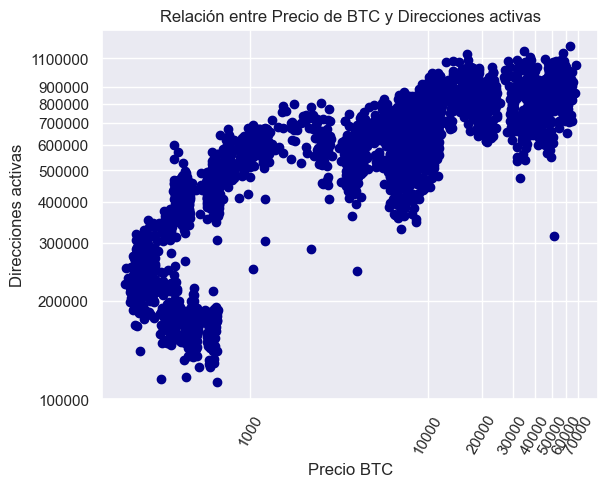

In [23]:
plt.scatter(df_log['PriceUSD_log'], df_log['activeaddresses_log'])
plt.xlabel('Precio BTC')
plt.ylabel('Direcciones activas')
plt.title('Relación entre Precio de BTC y Direcciones activas')

x_ticks = np.array([1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
plt.xticks(np.log(x_ticks), x_ticks)
plt.xticks(np.log(x_ticks), x_ticks.astype(int), rotation=60)

y_ticks = np.array([100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1100000])
plt.yticks(np.log(y_ticks), y_ticks.astype(int))

plt.show()

En este gáfico se puede apreciar como el precio de BTC influye positivamente en la cantidad de direcciones activas totales.

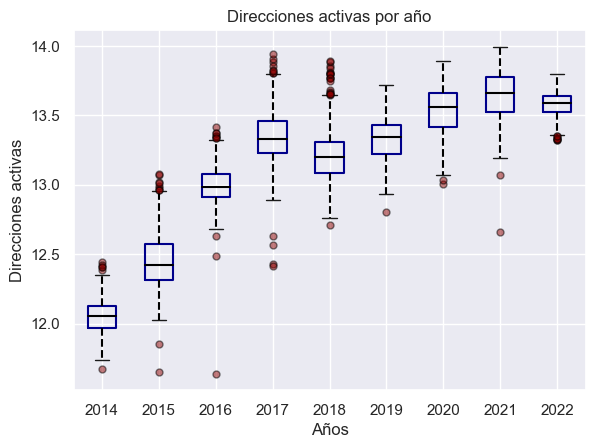

In [24]:
boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='black')
flierprops = dict(marker='o', markerfacecolor='darkred', markersize=5, alpha=0.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='black')

df.boxplot(column='activeaddresses_log', by='Year', boxprops=boxprops, whiskerprops=whiskerprops, flierprops=flierprops, medianprops=medianprops)
plt.xlabel('Años')
plt.ylabel('Direcciones activas')
plt.title('Direcciones activas por año')
plt.suptitle('')

plt.show()

<AxesSubplot: title={'center': 'Relación entre direcciones activas y BTC enviado'}, xlabel='sentbyaddress', ylabel='activeaddresses'>

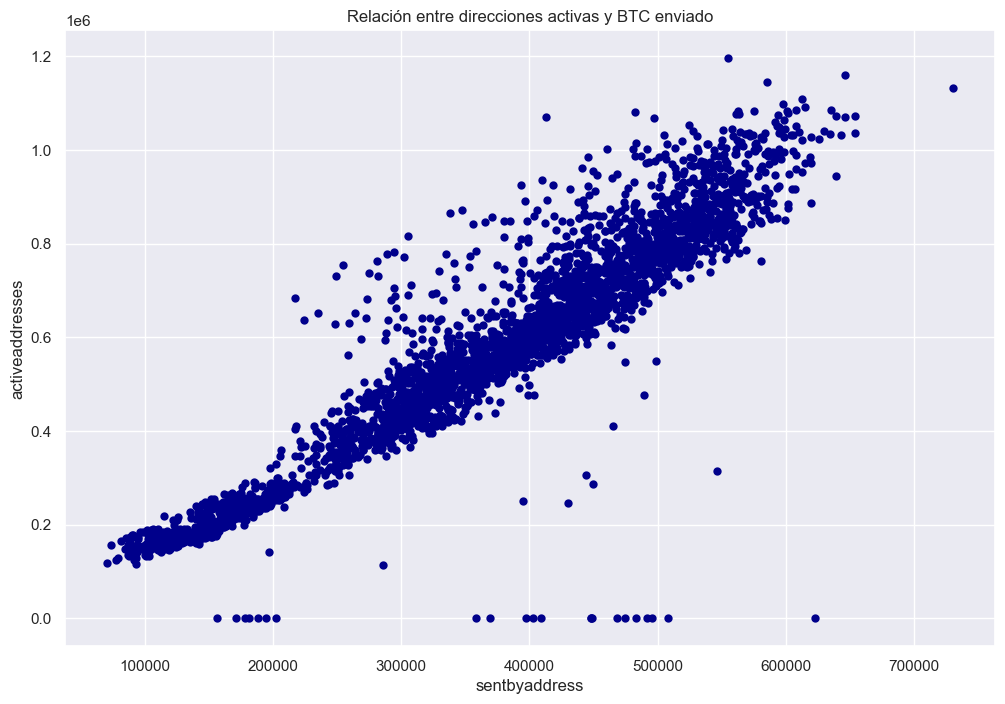

In [25]:
df.plot(x='sentbyaddress',y='activeaddresses',kind='scatter',lw=1.5,figsize=(12,8),title='Relación entre direcciones activas y BTC enviado')

Las direcciones activas de BTC tienen una fuerte relación con el valor de las transacciones enviadas. Tal cual se aprecia en el gráfico, cuando mayor es la cantidad de direcciones activas, mayor es la cantidad de BTC que se envia.

**CONCLUSIÓN 2**

Se puede concluir que el precio de Bitcoin es un factor importante para determinar la cantidad de direcciones activas. La afirmación se basa principalmente en los buenos resultados arrojados por los modelos de machine learning generados y por el análisis de los gráficos presentados. 

Esto sugiere que a medida que el precio de Bitcoin aumenta, también lo hace la cantidad de direcciones activas (tal cual se planteaba en la hipótesis 2). En el futuro, si el precio de Bitcoin continúa aumentando, se podría esperar un aumento en la cantidad de direcciones activas.

**DATOS ADICIONALES**

Dado que el dataset utilizado presenta información hasta finales del año 2022, se plantea un metodo para obtener información actualizada sobre el precio de BTC utilizando la importación de datos por medio de APIs.

La API seleccionada es la de *BitcoinCharts*, la información que se considera relevante en esta API es la de precios ponderados de BTC actualizados diariamente. La API retorna el precio promedio ponderado(PPP) de BTC de las últimas 24 horas, ofreciendo también el calculo de PPP semanal y PPP mensual.


En esta API también se puede encontrar información actualizada diariamente sobre operaciones de trading realizadas en diferentes exchanges. Respecto a esta información, por el momento no se considera relevante para el análisis.

In [26]:
url_ponderados = 'http://api.bitcoincharts.com/v1/weighted_prices.json'
df_ponderados = requests.get(url_ponderados)

In [27]:
def imprime_df(i):
    print(i)

imprime_df(df_ponderados)

<Response [200]>


In [28]:
print(len(df_ponderados.text))
df_ponderados.text

498


'{"USD": {"7d": "29290.08", "30d": "30106.70", "24h": "29434.11"}, "AUD": {"7d": "43910.22", "30d": "44763.34", "24h": "44858.83"}, "timestamp": 1690989306, "KRW": {"7d": "38048122.84", "30d": "39237190.12", "24h": "38503222.85"}, "JPY": {"7d": "4151317.41", "30d": "4241819.03", "24h": "4215354.79"}, "ILS": {"7d": "109023.08", "30d": "110662.41", "24h": "108243.96"}, "EUR": {"7d": "26587.27", "30d": "27187.75", "24h": "26770.13"}, "CAD": {"7d": "38718.37", "30d": "39613.65", "24h": "38900.33"}}'

In [29]:
texto_ponderados = df_ponderados.text
json.loads(texto_ponderados)

{'USD': {'7d': '29290.08', '30d': '30106.70', '24h': '29434.11'},
 'AUD': {'7d': '43910.22', '30d': '44763.34', '24h': '44858.83'},
 'timestamp': 1690989306,
 'KRW': {'7d': '38048122.84', '30d': '39237190.12', '24h': '38503222.85'},
 'JPY': {'7d': '4151317.41', '30d': '4241819.03', '24h': '4215354.79'},
 'ILS': {'7d': '109023.08', '30d': '110662.41', '24h': '108243.96'},
 'EUR': {'7d': '26587.27', '30d': '27187.75', '24h': '26770.13'},
 'CAD': {'7d': '38718.37', '30d': '39613.65', '24h': '38900.33'}}

In [30]:
jsondata_p = json.loads(texto_ponderados)
df_ponderados1 = pd.DataFrame.from_dict(jsondata_p)
df_ponderados1.head()

,USD,AUD,timestamp,KRW,JPY,ILS,EUR,CAD
7d,29290.08,43910.22,1690989306,38048122.84,4151317.41,109023.08,26587.27,38718.37
30d,30106.70,44763.34,1690989306,39237190.12,4241819.03,110662.41,27187.75,39613.65
24h,29434.11,44858.83,1690989306,38503222.85,4215354.79,108243.96,26770.13,38900.33


In [31]:
data_markets = pd.read_json(df_ponderados.text)
precios_ponderados240723 = '..\data\PPP_bitcoincharts\ponderados240723.csv'
data_markets.to_csv(precios_ponderados240723, index=False)

#Se exporta el archivo a la carpeta data, en formato .csv para guardar un historial de esta información.

## INGENIERIA DE ATRIBUTOS

Con el objetivo de generar un modelo de ML con mayor complejidad se procede a aplicar ingenieria de atributos

A continuación se crean las siguientes variables: 
- marketcapM : expresa la capitalización de mercado en millones de dolares
- activeaddresses : toma solamente las direcciones activas mayores que cero
- prom_trans_actadresses : realiza el promedio de transacciones por direcciones activas de cada dia

In [32]:
df_newvars = pd.DataFrame()

df_newvars['date'] = df['Date']
df_newvars['price_usd'] = df['priceUSD']
df_newvars['marketcapM'] = df['marketcap'] /1000000
df_newvars['transactions'] = df['transactions']
df_newvars['activeaddresses'] = df['activeaddresses'][df['activeaddresses'] > 0]
df_newvars['prom_trans_actadresses'] = df_newvars['transactions'] / df_newvars['activeaddresses']

df_newvars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3180 non-null   datetime64[ns]
 1   price_usd               3180 non-null   float64       
 2   marketcapM              3180 non-null   float64       
 3   transactions            3180 non-null   int64         
 4   activeaddresses         3158 non-null   float64       
 5   prom_trans_actadresses  3158 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 149.2 KB


In [33]:
print(df_newvars.isnull().sum())

date                       0
price_usd                  0
marketcapM                 0
transactions               0
activeaddresses           22
prom_trans_actadresses    22
dtype: int64


In [34]:
df_newvars.dropna(subset=['activeaddresses', 'prom_trans_actadresses'], inplace=True)
df_newvars.reset_index(drop=True, inplace=True)
print(df_newvars.isnull().sum())

date                      0
price_usd                 0
marketcapM                0
transactions              0
activeaddresses           0
prom_trans_actadresses    0
dtype: int64


Se eliminan 22 valores nulos del nuevo dataset generado.

In [35]:
df_newvars.set_index('date', inplace=True)

Se establece como indice la columna de fecha.

In [36]:
df_newvars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3158 entries, 2014-04-09 to 2022-12-22
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_usd               3158 non-null   float64
 1   marketcapM              3158 non-null   float64
 2   transactions            3158 non-null   int64  
 3   activeaddresses         3158 non-null   float64
 4   prom_trans_actadresses  3158 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 148.0 KB


In [40]:
scaler = StandardScaler()

# características a estandarizar
features_to_scale = ['price_usd', 'marketcapM', 'transactions', 'activeaddresses', 'prom_trans_actadresses']

# estandarización a las características seleccionadas
df_newvars_std = pd.DataFrame()
df_newvars_std[features_to_scale] = scaler.fit_transform(df_newvars[features_to_scale])

In [41]:
df_newvars_std.describe()

,price_usd,marketcapM,transactions,activeaddresses,prom_trans_actadresses
count,3.158000e+03,3.158000e+03,3.158000e+03,3158.000000,3.158000e+03
mean,-3.599963e-17,1.439985e-16,1.439985e-16,0.000000,-2.699972e-16
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158,1.000158e+00
min,-7.521294e-01,-7.388362e-01,-2.247894e+00,-1.977788,-2.315483e+00
25%,-7.267383e-01,-7.177565e-01,-5.262717e-01,-0.684320,-8.526293e-01
50%,-3.538978e-01,-3.718793e-01,1.789695e-01,0.073659,-7.729088e-03
75%,1.945702e-01,1.522938e-01,7.068834e-01,0.789118,6.777780e-01
max,3.448826e+00,3.456791e+00,3.011858e+00,2.601438,1.664708e+01


In [45]:
x_nv = df_newvars_std[['transactions', 'activeaddresses']]
y_nv = df_newvars_std['price_usd']

### LINEAR REGRESSION

In [46]:
x_train_lr_nv, x_test_lr_nv, y_train_lr_nv, y_test_lr_nv = train_test_split(x_nv, y_nv, test_size=0.25, random_state=10000)

# Paso1: entrenar el modelo.
model_lr_nv = LinearRegression()
model_lr_nv.fit(x_train_lr_nv, y_train_lr_nv)

# Paso2: Calcular el MSE y RMSE en el conjunto de entrenamiento.
y_train_pred_lr_nv = model_lr_nv.predict(x_train_lr_nv)
mse_train_lr_nv = mean_squared_error(y_train_lr_nv, y_train_pred_lr_nv)
print(f'MSE en el conjunto de entrenamiento:, {mse_train_lr_nv:.4f}')
print(f'RMSE en el conjunto de entrenamiento:, {math.sqrt(mse_train_lr_nv):.4f}')

# Paso3: Calcular el MSE y RMSE en el conjunto de prueba.
y_test_pred_lr_nv = model_lr_nv.predict(x_test_lr_nv)
mse_test_lr_nv = mean_squared_error(y_test_lr_nv, y_test_pred_lr_nv)
print(f'MSE en el conjunto de prueba:, {mse_test_lr_nv:.4f}')
print(f'RMSE en el conjunto de prueba: {math.sqrt(mse_test_lr_nv):.4f}')

MSE en el conjunto de entrenamiento:, 0.3784
RMSE en el conjunto de entrenamiento:, 0.6151
MSE en el conjunto de prueba:, 0.3640
RMSE en el conjunto de prueba: 0.6033


### POLYNOMIAL FEATURES

In [47]:
poly_nv = PolynomialFeatures(degree=2)
x_poly_nv = poly_nv.fit_transform(x)

# Paso1: entrenar el modelo.
x_train_pf_nv, x_test_pf_nv, y_train_pf_nv, y_test_pf_nv = train_test_split(x_poly_nv, y_nv, test_size=0.2, random_state=42)

# Paso2: Calcular el MSE y RMSE en el conjunto de entrenamiento.
model_pf_nv = LinearRegression()
model_pf_nv.fit(x_train_pf_nv, y_train_pf_nv)

# Paso3: Calcular el MSE y RMSE en el conjunto de entrenamiento.
y_train_pred_pf_nv = model_pf_nv.predict(x_train_pf_nv)
mse_train_pf_nv = mean_squared_error(y_train_pf_nv, y_train_pred_pf_nv)
print(f'MSE en el conjunto de entrenamiento: {mse_train_pf_nv:.4f}')
print(f'RMSE en el conjunto de entrenamiento: {math.sqrt(mse_train_pf_nv):.4f}')

# Paso3: Calcular el MSE y RMSE en el conjunto de prueba.
y_test_pred_pf_nv = model_pf_nv.predict(x_test_pf_nv)
mse_test_pf_nv = mean_squared_error(y_test_pf_nv, y_test_pred_pf_nv)
print(f'MSE en el conjunto de prueba: {mse_test_pf_nv:.4f}')
print(f'RMSE en el conjunto de prueba: {math.sqrt(mse_test_pf_nv):.4f}')

MSE en el conjunto de entrenamiento: 0.0372
RMSE en el conjunto de entrenamiento: 0.1930
MSE en el conjunto de prueba: 0.0360
RMSE en el conjunto de prueba: 0.1898


In [48]:
# Modelo Linear Regression
scores_lr_nv = cross_val_score(model_lr_nv, x_train_lr_nv, y_train_lr_nv, cv=5)  # Validación cruzada con 5 folds
mean_score_lr_nv = scores_lr_nv.mean()  # Puntuación media

# Modelo Polynomial Features
model_pf_nv = LinearRegression()
scores_pf_nv = cross_val_score(model_pf_nv, x_train_pf_nv, y_train_pf_nv, cv=5)  # Validación cruzada con 5 folds
mean_score_pf_nv = scores_pf_nv.mean()  # Puntuación media

print(f'Puntuación media del modelo Linear Regression: {mean_score_lr_nv:.4f}')
print(f'Puntuación media del modelo Polynomial Features: {mean_score_pf_nv:.4f}')

Puntuación media del modelo Linear Regression: 0.6310
Puntuación media del modelo Polynomial Features: 0.9626


El modelo que mejor performa es el Polynomial Features, ya que presenta mejores valores de MSE y RMSE tanto en train como en test.

Además al comparar ambos modelos aplicando cross validation, también se encuentra que este modelo posee mejores resultados.

In [62]:
# Resultados del modelo LinearRegression
results_LR2 = {
    'MSE_TRAIN': mse_train_LR2,
    'RMSE_TRAIN': math.sqrt(mse_train_LR2),
    'MSE_TEST': mse_test_LR2,
    'RMSE_TEST': math.sqrt(mse_test_LR2),
    'CROSS_VAL': np.mean(rmse_cv_LR2)
}

# Resultados del modelo PolynomialFeatures
results_PF = {
    'MSE_TRAIN': mse_train_PF,
    'RMSE_TRAIN': math.sqrt(mse_train_PF),
    'MSE_TEST': mse_test_PF,
    'RMSE_TEST': math.sqrt(mse_test_PF),
    'CROSS_VAL': np.mean(rmse_cv_PF)
}

results_LR_nv = {
    'MSE_TRAIN': mse_train_lr_nv,
    'RMSE_TRAIN': math.sqrt(mse_train_lr_nv),
    'MSE_TEST': mse_test_lr_nv,
    'RMSE_TEST': math.sqrt(mse_test_lr_nv),
    'CROSS_VAL': np.mean(scores_lr_nv)
}

results_PF_nv = {
    'MSE_TRAIN': mse_train_pf_nv,
    'RMSE_TRAIN': math.sqrt(mse_train_pf_nv),
    'MSE_TEST': mse_test_pf_nv,
    'RMSE_TEST': math.sqrt(mse_test_pf_nv),
    'CROSS_VAL': np.mean(scores_pf_nv)
}

df_results = pd.DataFrame({
    'Modelo LinearRegression': results_LR2,
    'Modelo PolynomialFeatures': results_PF,
    'Modelo LinearRegression-NV': results_LR_nv,
    'Modelo PolynomialFeatures-NV': results_PF_nv,
})

print(df_results)

            Modelo LinearRegression  Modelo PolynomialFeatures  \
MSE_TRAIN                  0.072137                   0.039951   
RMSE_TRAIN                 0.268583                   0.199876   
MSE_TEST                   0.071933                   0.040504   
RMSE_TEST                  0.268203                   0.201256   
CROSS_VAL                  0.413814                   0.344359   

            Modelo LinearRegression-NV  Modelo PolynomialFeatures-NV  
MSE_TRAIN                     0.378357                      0.037241  
RMSE_TRAIN                    0.615107                      0.192980  
MSE_TEST                      0.363952                      0.036019  
RMSE_TEST                     0.603284                      0.189786  
CROSS_VAL                     0.630996                      0.962607  


### Conclusión:

A partir del contraste de resultados entre los modelos generados, se encuentra que el segundo modelo PolynomialFeatures planteado es el que mejor performa a nivel general.

## PCA

A continuación se aplica PCA sobre las variables usadas para explorar las cargas de los 2 primeros componentes, e identificar las variables más relevantes

In [50]:
df_newvars_PCA = df_newvars
df_newvars_PCA = df_newvars_PCA.drop('prom_trans_actadresses', axis=1)

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_newvars_PCA)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [52]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [53]:
pca_pipe.fit(df_newvars_PCA)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [54]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_newvars_PCA.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,price_usd,marketcapM,transactions,activeaddresses
PC1,0.526605,0.524928,0.398159,0.537221
PC2,0.434326,0.440060,-0.715346,-0.325559
PC3,0.177439,0.182717,0.574238,-0.778062
PC4,0.708917,-0.705274,-0.001229,-0.004861


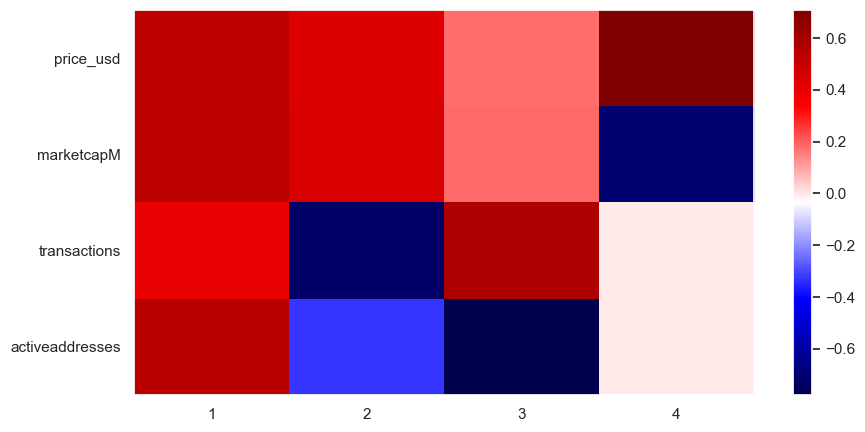

In [56]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(df_newvars_PCA.columns)), df_newvars_PCA.columns)
plt.xticks(range(len(df_newvars_PCA.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();